Rupesh Bharambe (AI3107)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


In [4]:
IMG_SIZE = (256, 256)

def load_images(gray_folder, color_folder):
    gray_images, color_images = [], []

    for filename in os.listdir(gray_folder):
        gray_path = os.path.join(gray_folder, filename)
        color_path = os.path.join(color_folder, filename)

        if not os.path.exists(color_path):
            continue

        # Load grayscale as 1-channel
        gray = load_img(gray_path, color_mode='grayscale', target_size=IMG_SIZE)
        gray = img_to_array(gray) / 255.0

        # Load color image as RGB
        color = load_img(color_path, color_mode='rgb', target_size=IMG_SIZE)
        color = img_to_array(color) / 255.0

        gray_images.append(gray)
        color_images.append(color)

    return np.array(gray_images), np.array(color_images)



In [5]:

# Load training data
train_gray, train_color = load_images('/content/drive/MyDrive/AEDataset/Train/grey/',
                                      '/content/drive/MyDrive/AEDataset/Train/color')

#  Load test data
test_gray, test_color = load_images('/content/drive/MyDrive/AEDataset/Test/grey',
                                    '/content/drive/MyDrive/AEDataset/Test/color/')

In [6]:
print(test_gray.shape)

(40, 256, 256, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, InputLayer
from tensorflow.keras.losses import MeanSquaredError # Import the loss class

def build_autoencoder():
    model = Sequential()

    # Input layer
    model.add(InputLayer(input_shape=(256, 256, 1)))

    # Encoder
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), padding='same'))

    # Decoder
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Output: 3-channel RGB with sigmoid to stay in [0, 1]
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

    return model


autoencoder = build_autoencoder()
# Use the MeanSquaredError class directly
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())
autoencoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 256, 256, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,891 (5.09 MB)

 Trainable params: 1,332,099 (5.08 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [13]:
## train the model and save best model
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a callback to save the best model
checkpoint = ModelCheckpoint(
    'best_colorization_model.h5',      # Filepath to save the best model
    monitor='val_loss',                # Metric to monitor
    save_best_only=True,               # Save only the best model
    mode='min',                        # We want to minimize validation loss
    verbose=1
)

# Train the model with the callback
history = autoencoder.fit(
    train_gray, train_color,
    epochs=30,
    batch_size=16,
    validation_data=(test_gray, test_color),
    callbacks=[checkpoint]
)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - loss: 0.1104
Epoch 1: val_loss improved from inf to 0.08471, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.1064 - val_loss: 0.0847
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.0313
Epoch 2: val_loss improved from 0.08471 to 0.08330, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 324ms/step - loss: 0.0314 - val_loss: 0.0833
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - loss: 0.0309
Epoch 3: val_loss improved from 0.08330 to 0.08173, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 310ms/step - loss: 0.0307 - val_loss: 0.0817
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.0275
Epoch 4: val_loss did not improve from 0.08173
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - loss: 0.0275 - val_loss: 0.0861
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: 0.0268
Epoch 5: val_loss improved from 0.08173 to 0.07028, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - loss: 0.0268 - val_loss: 0.0703
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 0.0232
Epoch 6: val_loss did not improve from 0.07028
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - loss: 0.0233 - val_loss: 0.0803
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 0.0258
Epoch 7: val_loss improved from 0.07028 to 0.05802, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - loss: 0.0256 - val_loss: 0.0580
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 0.0225
Epoch 8: val_loss did not improve from 0.05802
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - loss: 0.0228 - val_loss: 0.0704
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 0.0230
Epoch 9: val_loss did not improve from 0.05802
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - loss: 0.0232 - val_loss: 0.0664
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.0253
Epoch 10: val_loss did not improve from 0.05802
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 308ms/step - loss: 0.0253 - val_loss: 0.0709
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 0.0230
Epoch 11: val_loss did not improve from 0.05802
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - loss: 0.0232 - val_loss: 0.0636
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 0.0256
Epoch 12: val_loss did not improve from 0.05802
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - loss: 0.0254 - val_loss: 0.0

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - loss: 0.0217 - val_loss: 0.0575
Epoch 21/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 0.0210
Epoch 21: val_loss did not improve from 0.05753
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - loss: 0.0211 - val_loss: 0.0594
Epoch 22/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 0.0207
Epoch 22: val_loss did not improve from 0.05753
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - loss: 0.0210 - val_loss: 0.0587
Epoch 23/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.0229
Epoch 23: val_loss improved from 0.05753 to 0.05745, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - loss: 0.0227 - val_loss: 0.0574
Epoch 24/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 0.0207
Epoch 24: val_loss did not improve from 0.05745
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - loss: 0.0207 - val_loss: 0.0609
Epoch 25/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 0.0221
Epoch 25: val_loss improved from 0.05745 to 0.05564, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - loss: 0.0221 - val_loss: 0.0556
Epoch 26/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 0.0212
Epoch 26: val_loss did not improve from 0.05564
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - loss: 0.0213 - val_loss: 0.0596
Epoch 27/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 0.0251
Epoch 27: val_loss improved from 0.05564 to 0.05153, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - loss: 0.0249 - val_loss: 0.0515
Epoch 28/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 0.0235
Epoch 28: val_loss did not improve from 0.05153
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 301ms/step - loss: 0.0233 - val_loss: 0.0549
Epoch 29/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.0208
Epoch 29: val_loss did not improve from 0.05153
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - loss: 0.0210 - val_loss: 0.0562
Epoch 30/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.0206
Epoch 30: val_loss improved from 0.05153 to 0.05072, saving model to best_colorization_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - loss: 0.0206 - val_loss: 0.0507


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


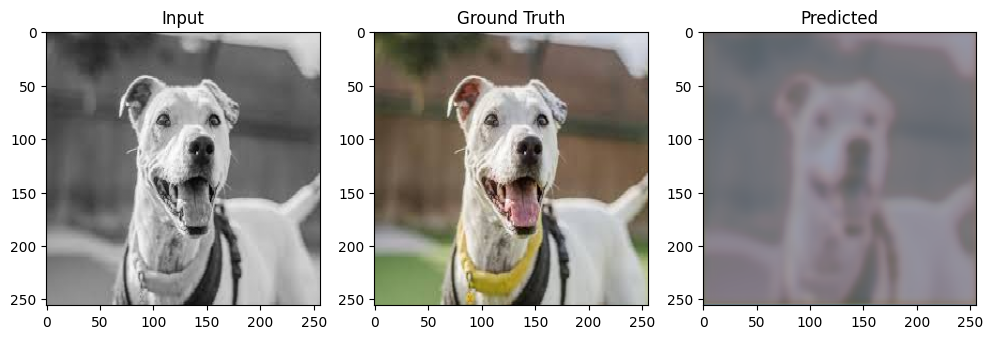

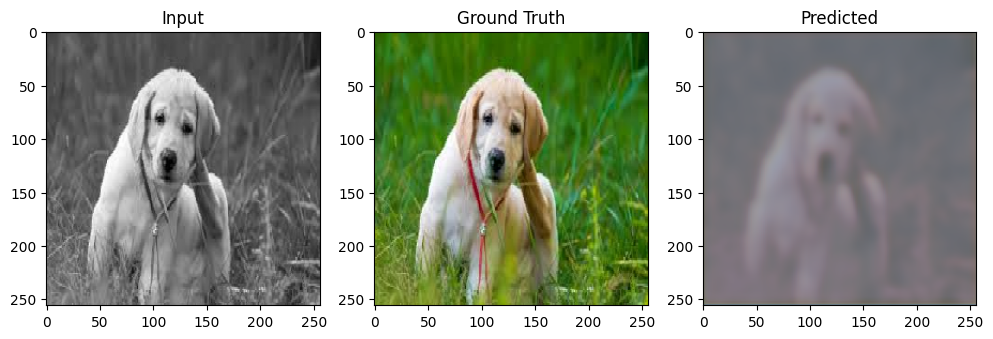

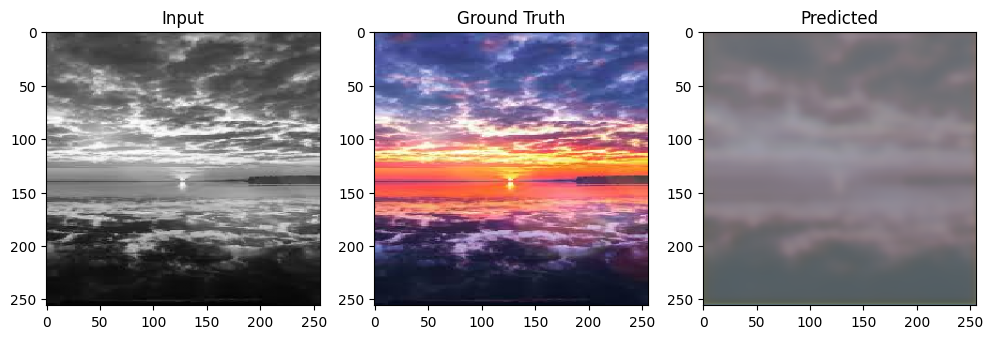

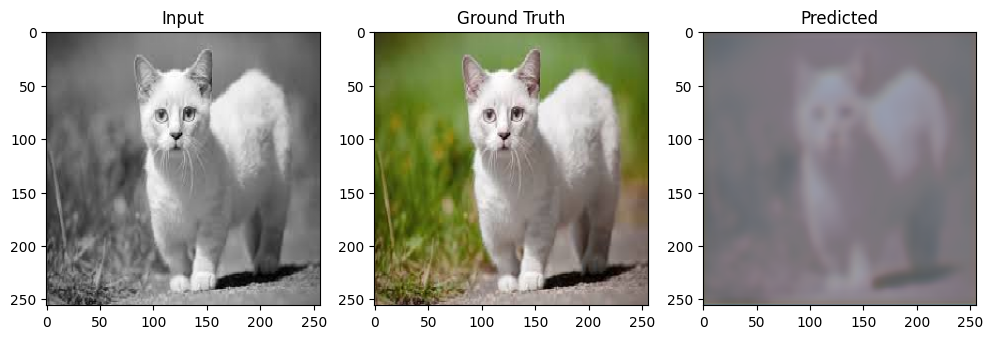

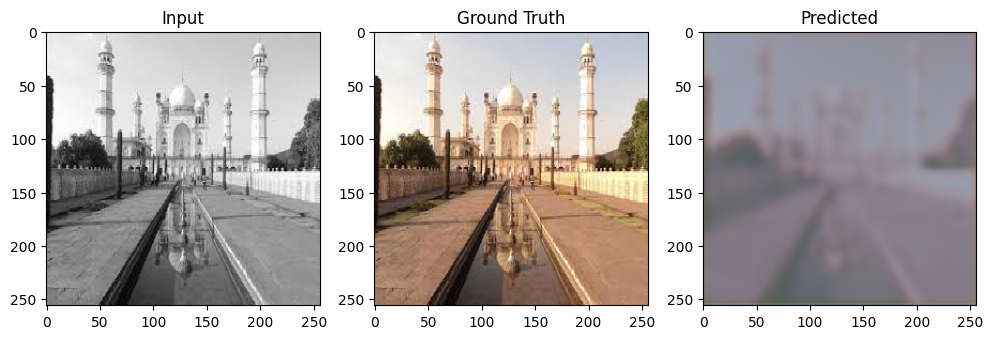

In [14]:
# Predict on test images
preds = autoencoder.predict(test_gray)

# Save example results
import matplotlib.pyplot as plt

n = 5
for i in range(n):
    plt.figure(figsize=(12, 4))

    # Grayscale input
    plt.subplot(1, 3, 1)
    plt.imshow(test_gray[i].squeeze(), cmap='gray')
    plt.title("Input")

    # Ground truth color
    plt.subplot(1, 3, 2)
    plt.imshow(test_color[i])
    plt.title("Ground Truth")

    # Predicted color
    plt.subplot(1, 3, 3)
    plt.imshow(preds[i])
    plt.title("Predicted")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


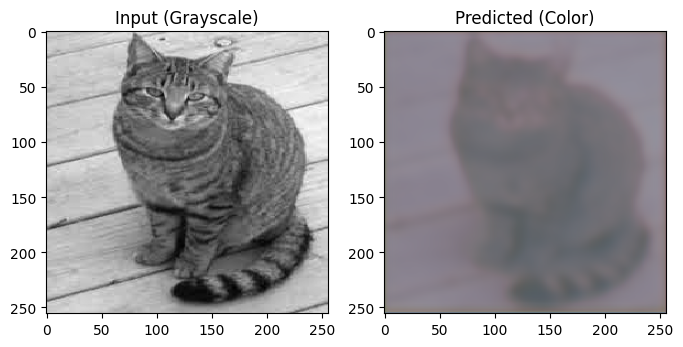

In [15]:
#prediction code
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the model from file
autoencoder = load_model('/content/best_colorization_model.h5')

def preprocess_gray_image(img_path):
    img = load_img(img_path, color_mode='grayscale', target_size=(256, 256))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Example prediction
gray_input = preprocess_gray_image('/content/drive/MyDrive/AEDataset/Test/grey/SANJU.jpg')
predicted_color = autoencoder.predict(gray_input)

# Remove batch dimension and show
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_input[0].squeeze(), cmap='gray')
plt.title("Input (Grayscale)")

plt.subplot(1, 2, 2)
plt.imshow(predicted_color[0])
plt.title("Predicted (Color)")

plt.show()
